In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | ossora
Processing Record 4 of Set 1 | mwinilunga
Processing Record 5 of Set 1 | paamiut
Processing Record 6 of Set 1 | egvekinot
Processing Record 7 of Set 1 | worthington
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | tsienyane
City not found. Skipping...
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | magaria
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | olafsvik
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | nyuksenitsa
Processing Record 20 of Set 1 | vi

Processing Record 39 of Set 4 | amuntai
Processing Record 40 of Set 4 | cadillac
Processing Record 41 of Set 4 | alpena
Processing Record 42 of Set 4 | marawi
Processing Record 43 of Set 4 | del rio
Processing Record 44 of Set 4 | santiago
Processing Record 45 of Set 4 | malka
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | bubaque
Processing Record 48 of Set 4 | tual
Processing Record 49 of Set 4 | mangrol
Processing Record 50 of Set 4 | kavieng
Processing Record 1 of Set 5 | bolgar
Processing Record 2 of Set 5 | walvis bay
Processing Record 3 of Set 5 | hami
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | krutinka
Processing Record 6 of Set 5 | zaraza
Processing Record 7 of Set 5 | gewane
Processing Record 8 of Set 5 | rincon de romos
Processing Record 9 of Set 5 | hovd
Processing Record 10 of Set 5 | belmonte
Processing Record 11 of Set 5 | verkhnevilyuysk
Processing Record 12 of Set 5 | kamenka
Processing Record 13 of Set 5 

Processing Record 30 of Set 8 | pouembout
Processing Record 31 of Set 8 | bendigo
Processing Record 32 of Set 8 | guaruja
Processing Record 33 of Set 8 | lac du bonnet
Processing Record 34 of Set 8 | dongsheng
Processing Record 35 of Set 8 | northam
Processing Record 36 of Set 8 | nueva germania
Processing Record 37 of Set 8 | saint-joseph
Processing Record 38 of Set 8 | athlone
Processing Record 39 of Set 8 | beyneu
Processing Record 40 of Set 8 | krasnorechenskiy
Processing Record 41 of Set 8 | saint-leu
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | atambua
Processing Record 44 of Set 8 | hofn
Processing Record 45 of Set 8 | okhotsk
Processing Record 46 of Set 8 | yulara
Processing Record 47 of Set 8 | kalmunai
Processing Record 48 of Set 8 | asfi
Processing Record 49 of Set 8 | naze
Processing Record 50 of Set 8 | krasnodar
Processing Record 1 of Set 9 | brusyanskiy
Processing Record 2 of Set 9 | estevan
Processing Record 3 of Set 9 | grand gaube
Processin

Processing Record 17 of Set 12 | panaba
Processing Record 18 of Set 12 | chiredzi
Processing Record 19 of Set 12 | requena
Processing Record 20 of Set 12 | milos
Processing Record 21 of Set 12 | katherine
Processing Record 22 of Set 12 | san cristobal
Processing Record 23 of Set 12 | mafeteng
Processing Record 24 of Set 12 | padang
Processing Record 25 of Set 12 | neuruppin
Processing Record 26 of Set 12 | jaque
Processing Record 27 of Set 12 | kapoeta
Processing Record 28 of Set 12 | sungaipenuh
Processing Record 29 of Set 12 | zamhlay
City not found. Skipping...
Processing Record 30 of Set 12 | miyang
Processing Record 31 of Set 12 | tonstad
Processing Record 32 of Set 12 | hidalgo
Processing Record 33 of Set 12 | muisne
Processing Record 34 of Set 12 | la ronge
Processing Record 35 of Set 12 | kieta
Processing Record 36 of Set 12 | presidencia roque saenz pena
Processing Record 37 of Set 12 | dalkola
Processing Record 38 of Set 12 | lakes entrance
Processing Record 39 of Set 12 | de

In [7]:
len(city_data)

581

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-12.84,64,0,13.80,CA,2022-02-16 22:52:46
1,Bredasdorp,-34.5322,20.0403,58.32,77,96,3.44,ZA,2022-02-16 22:52:46
2,Ossora,59.2353,163.0719,5.04,93,100,7.31,RU,2022-02-16 22:52:46
3,Mwinilunga,-11.7358,24.4293,62.69,99,100,3.78,ZM,2022-02-16 22:52:47
4,Paamiut,61.9940,-49.6678,4.86,74,100,18.90,GL,2022-02-16 22:52:47
5,Egvekinot,66.3167,-179.1667,-11.34,89,11,11.83,RU,2022-02-16 22:52:47
6,Worthington,40.0931,-83.0180,59.05,57,100,12.66,US,2022-02-16 22:49:05
7,Vaini,-21.2000,-175.2000,86.16,79,20,6.91,TO,2022-02-16 22:52:48
8,Victoria,22.2855,114.1577,61.25,90,99,15.01,HK,2022-02-16 22:52:48
9,Magaria,12.9983,8.9099,74.14,13,0,8.39,NE,2022-02-16 22:52:49


In [9]:
df2 = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
df2.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-02-16 22:52:46,55.7435,-97.8558,-12.84,64,0,13.80
1,Bredasdorp,ZA,2022-02-16 22:52:46,-34.5322,20.0403,58.32,77,96,3.44
2,Ossora,RU,2022-02-16 22:52:46,59.2353,163.0719,5.04,93,100,7.31
3,Mwinilunga,ZM,2022-02-16 22:52:47,-11.7358,24.4293,62.69,99,100,3.78
4,Paamiut,GL,2022-02-16 22:52:47,61.9940,-49.6678,4.86,74,100,18.90
5,Egvekinot,RU,2022-02-16 22:52:47,66.3167,-179.1667,-11.34,89,11,11.83
6,Worthington,US,2022-02-16 22:49:05,40.0931,-83.0180,59.05,57,100,12.66
7,Vaini,TO,2022-02-16 22:52:48,-21.2000,-175.2000,86.16,79,20,6.91
8,Victoria,HK,2022-02-16 22:52:48,22.2855,114.1577,61.25,90,99,15.01
9,Magaria,NE,2022-02-16 22:52:49,12.9983,8.9099,74.14,13,0,8.39


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

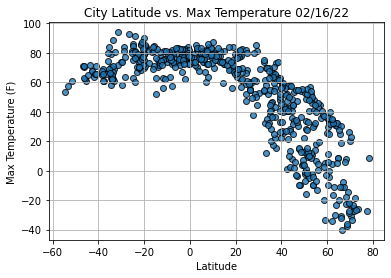

In [12]:
%matplotlib inline
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

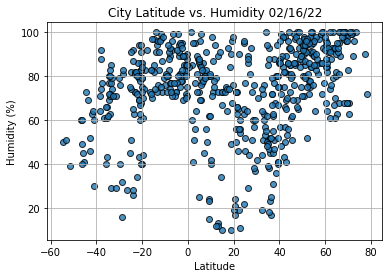

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

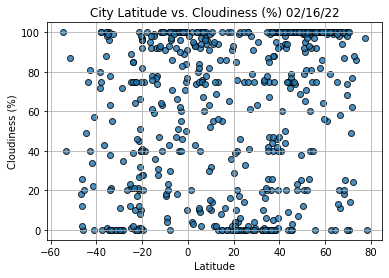

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

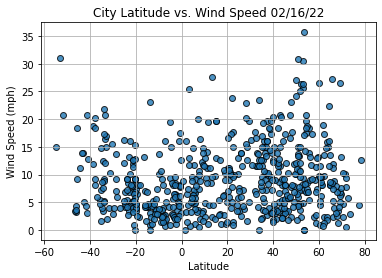

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

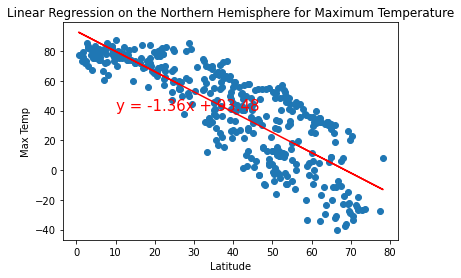

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

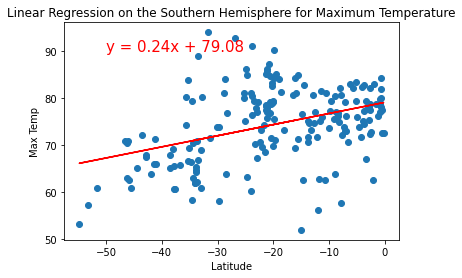

In [19]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

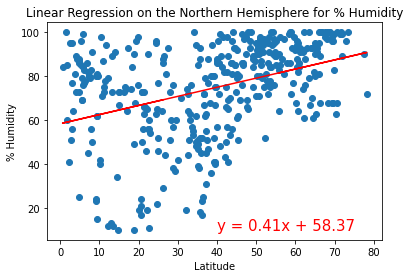

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

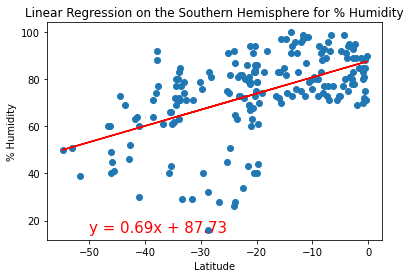

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

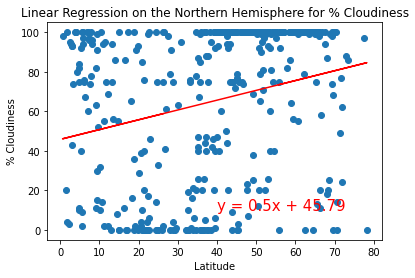

In [22]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

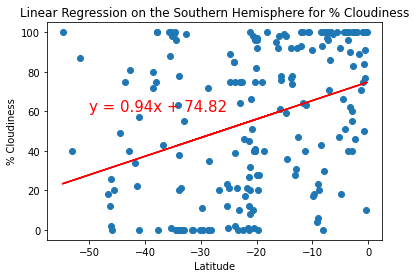

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

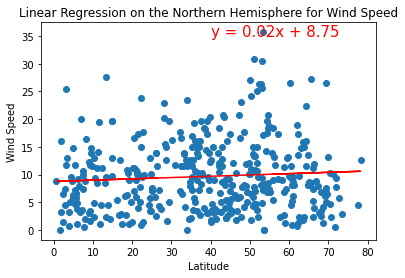

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

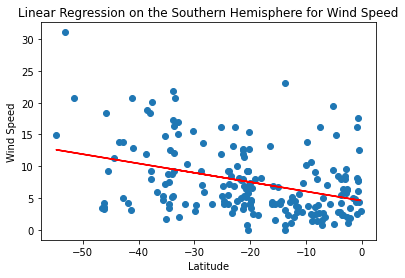

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))